# COGS 108 Final Project - Waitz Library Traffic


## Introduction and Background

As students at UC San Diego we are presented with some obstacles in our weekly responsibility to study and concentrate towards our schoolwork. We have collectively run into anecdotal evidence that a major obstacle for the average UC San Diego student is finding an optimal place to study. Students often need a place to study or work and naturally head to Geisel Library only to find that space is not immediately available and that it may take a substantial chunk of time just to find a chair to sit on. This problem can directly impact a student’s time management, cut down study time and deteriorate their ability to thrive.
    
This obstacle is already being tackled by Geisel Library and companies like Waitz. Geisel Library has created a medium on their website that allows students to book group study rooms and to view which study rooms are currently occupied. This effort mitigates the obstacle of finding a study space for student groups if they are able to reserve a room well in advance. However, this solution does not meet the needs of the average student. It lacks the needed flexibility, on-the-run foresight, and only covers a small fraction of Geisel Library. 

In a further attempt to cover the needs of individual students on a daily basis, Waitz launched an initiative to provide students with an accurate, real time, readily accessible representation of Geisel Library’s “traffic”- or the density of population in the Library’s many spaces. Founded by UCSD alumni, the company’s current goal is to turn this tool into an app available to help students save time and effort in their search for proper study space. By extension, Waitz’s project could substantially promote student success. 

So far, Waitz has developed a website which informs users of the current population in each floor of Geisel Library. In order to meet their goal of limiting human congestion by helping students to navigate library traffic; Waitz must be able to cover more specific areas of Geisel Library and to have a more predictive model of traffic coming to and from its spaces. There are a few factors which may have a direct effect on Geisel Library’s use which may be successful predictors for a predictive model of library traffic. Our COGS108 team has joined Waitz’s efforts by tackling this problem through a short term internship. Our project involves identifying possible correlative factors, quantifying their relationship to library traffic and developing a predictive data-driven model. Waitz will support us by giving us access to their advanced data collection and by mentoring us in the process. A foundational portion of our data analysis includes a dataset with live feed of the library’s population provided by Waitz.

The questions of interest are what trends can we see from the traffic of the library throughout time in a quarter and what external factors influence the traffic?

We have hypotheses relating to external factors such as in the middle of the day and warmer temperature has a positive correlation to a higher population in Geisel. A higher number of people in Geisel when closer to midterms/final weeks (finals probably more). Observation of us UCSD students of seeing a lot of people in the library during this time. Less availability of study rooms and spaces in Geisel indicate that there will be more people in Geisel. There will be a dip in the number of students at Geisel prior to next section of the class.

This question is important because it allows students to efficiently plan their study schedule. This will give them the opportunity to decide whether or not it is worth going to Geisel at a specific time. Since this saves students time from going to UCSD's Libraries, they will be able to focus on their other worries. 

For the Library traffic dataset, Waitz gathers our data through small hardware devices that pick up smartphone signals in the surrounding area. This gives a rough estimate on the number of students at a given location.

### Research Question

Can we predict the traffic in UCSD’s libraries using data encompassing weather, schedule, large-scale events, traffic, and shuttles in these areas? Can we then use a model of library traffic to predict when there is more available library space?

### Hypothesis

UCSD’s library traffic is affected by the weather, timing of exams, class schedules, large-scale events, and shuttle schedules. Therefore, by using data from weather forecasts, class schedules, event calendars, and live shuttle maps, we will predict when the traffic within the library. By extension, this will also allow us to predict when the library will have available study space for those looking to study.

## Group Members:

- A14709564 (Philip La)
    - Contributed to Introduction and Background, Data Description, Data Cleaning/Pre-processing, Data Visualization, Data Analysis and Results, Privacy/Ethics Consideration, Conclusions and Discussion 
- A14782354
- A92120441
- A14697769
- A12297371
- A12753074

## Data Description

- **Dataset Name: Waitz**
- Link to the dataset:
https://drive.google.com/file/d/1uGPgA2lcjtHfPnOkWlTi4CUhu677tHz_/view?usp=sharing
https://f3sszy41z4.execute-api.us-west-2.amazonaws.com/testing/get-hub-mapping
- Number of observations: (All of last fall quarter + Half of spring quarter quarter) * ~1,000 observations per day

This dataset is given by https://www.ucsdwaitz.com/ and allowed by Professor Voytek as we had to signed legal documents to get access to the full dataset which contains features of time and present signals of Geisel Library, Biomed Library, as well as other venues such as Price Center for 2017 Fall Quarter and 2018 Spring Quarter. The links to the dataset only give a sample of the data as well the full dataset is stored in a database (DynamoDB).

- **Dataset Name: Weather by hour in San Diego Montgomery, CA**
- Link to the dataset: https://drive.google.com/file/d/1AzCrS6SybPOwAXEuSdPDEoDVxWjaRhmb/view?usp=sharing
- Number of observations: 11,000+

This dataset shows the information about the temperature, dew point, and other weather conditions of San Diego Montgomery, CA. This data presents the temperature of the city per hour from the year 2017-current and we scrape all pages through last quarter to this quarter, day by day using this URL format: https://www.wunderground.com/history/airport/KMYF/2018/02/16/DailyHistory.html?req_city=San%20Diego%20Montgomery&req_state=CA&reqdb.zip=92123&reqdb.magic=4&reqdb.wmo=99999.

- **Dataset Name: UCSD Shuttle**
- Link to the dataset: https://drive.google.com/file/d/1JfoZWVrGFwW0ItEqW3eqvkuDr6AEr2qD/view?usp=sharing
- Number of observations: 20,000+

Shows the speed and capacity of each of UCSD's shuttles for the routes they take. The routes are Arriba Shuttle, Mesa Nueva Shuttle, North Campus Shuttle, SIO Shuttle, South Campus Shuttle, and West Campus Connector and we may also include arrival times for each stop as well for a given time.

- **Dataset Name: Scheduling of Classes via time**
- Link to the dataset: https://act.ucsd.edu/scheduleOfClasses/scheduleOfClassesStudent.htm
- Number of observations: 16,000+

For this dataset, we are counting the total number of UCSD students that are taking classes at a certain period of time. This dataset with measure per hour for Fall 2017, Spring 2017, and Winter 2018 and we got this data by scraping the UCSD's schedule of classes website.

We plan to combine these datasets by seeing the correlation between and how these external factors of weather, class schedule and shuttle's data will influence the traffic to Geisel library and possibly other venues as well.

## Data Cleaning/Pre-processing

We first get data from Waitz by querying their database. Then we get weather, shuttle, and schedule of classes by scraping websites.

### Waitz - Geisel Library Traffic

In [5]:
# Database
import requests
import boto3
from boto3.dynamodb.conditions import Key, Attr

# Processing
import pandas as pd
from pathlib import Path
from functools import reduce
import json
from multiprocessing.dummy import Pool as ThreadPool

# Time
import datetime
import time
import pytz

In [6]:
# Utility functions

def file_exists(file_name):
    my_file = Path(file_name)
    return my_file.is_file()

def ts_to_dt(ts):
    date, time = ts.split()[0], ts.split()[1]
    month, day, year = [int(x) for x in date.split("/")]
    hour, minute = [int(x) for x in time.split(":")[:2]]
    return datetime.datetime(year, month, day, hour, minute)

def dt_to_ts(dt):
    return dt.strftime('%m/%d/%Y %H:%M')

def start_and_end_dt(day):
    start = dt_to_ts(day + datetime.timedelta(hours=7))
    end = dt_to_ts(day + datetime.timedelta(hours=23, minutes=59))
    return start, end

def merge_dfs(df1, df2):
    if len(df2) == 0:
        return df1
    if len(df1) == 0:
        return df2
    df3 = pd.merge(df1, df2, on='Time_Stamp')
    df3['Present_Signals'] = df3['Present_Signals_x'] + df3['Present_Signals_y']
    return df3[['Time_Stamp', 'Present_Signals']]

In [7]:
# Load and clean Waitz's Geisel data
def get_geisel_data_from_db(earliest, latest, table_selection):
    # get basic info on hubs
    hub_map_url = "https://f3sszy41z4.execute-api.us-west-2.amazonaws.com/testing/get-hub-mapping"
    hubinfo = eval(requests.get(hub_map_url).text)

    # connect to DB
    hps_secdump = boto3.resource('dynamodb').Table(table_selection)

    df = pd.DataFrame(hubinfo)
    df = df.sort_values('Section')
    df = df.drop('DropRSSI',axis=1)

    # dataframe holds only hubs that are in geisel
    df_geisel = df[df['Section'].str.contains("Floor")]
    sections = set(df_geisel['Section'])

    AWS_READ_CAP_UNITS = 200

    """
    Section Dump Export
    """
    now_ts = lambda: datetime.datetime.now(tz=pytz.utc).astimezone(pytz.timezone("US/Pacific"))
    now_dt = lambda: datetime.datetime.now()
    print ("Started at: ", now_ts())
    cell_start = now_dt()
    print ("=======================================")

    section_data = {}

    day = earliest
    unitsconsumed = 0 
    top_counts = {}
    while day <= latest:
        ts = dt_to_ts(day)
        start, end = start_and_end_dt(day)
        dumpstart = now_dt()
        section_data[day] = {}
        print ("\nStarting Section dump for {} ({} days to go)".format(ts, (latest - day).days))

        for section in sections:
            if unitsconsumed >= AWS_READ_CAP_UNITS - 10: # let the cap units rest with buffer space
                time.sleep(1.5)
                unitsconsumed = 0

            resp = hps_secdump.query(
                KeyConditionExpression=Key('Section_Name').eq(section) & Key('Time_Stamp').between(start, end),
                ReturnConsumedCapacity="TOTAL")

            unitsconsumed += resp["ConsumedCapacity"]["CapacityUnits"]

            if resp["ResponseMetadata"]["HTTPStatusCode"] != 200 or "LastEvaluatedKey" in resp:
                print ("{} hub on {} didn't return all items".format(hubinfo["location"], day))
                print ("Current unitsconsumed: {}".format(unitsconsumed))
                print ("items returned: {}".format(resp["Count"]))
                print ("\n\nBefore Breaking: {} Total (successful) Queries".format(queries))
                break

            result = resp["Items"]
            if len(result) > 0:
                section_data[day][section] = pd.DataFrame(result)

        print ("{} dump took {}".format(ts, now_dt() - dumpstart))
        day += datetime.timedelta(days=1)

        print ("=======================================")
        print ("Ended at: ", now_ts())
        print ("Duration: ", now_dt() - cell_start)
    
    return section_data
    
def combiner(earliest, latest, section_data):
    """
    Combine all the sections
    """
    
    print("Starting combiner")

    dfs = []
    pre_dfs = []
    
    pool = ThreadPool(4) 
    
    def reducer(section):
        return reduce(merge_dfs, section, pd.DataFrame(columns=['Time_Stamp', 'Present_Signals']))
    
    day = earliest
    while day <= latest:
        section = section_data[day].values()
        pre_dfs.append(section)
        day += datetime.timedelta(days=1)
    
    dfs = pool.map(reducer, pre_dfs)
    
    geisel_df = pd.concat(dfs)
    geisel_df.index = geisel_df['Time_Stamp'].apply(lambda ts: ts_to_dt(ts))
    return geisel_df[['Present_Signals']]

# 'SectionDump' is for fall quarter 2017 and 'hubplacement-section-dump' is for winter quarter 2018
# 'SectionDump' starts at 2017-9-28 and 'hubplacement-section-dump' starts at 2018-1-10
def get_geisel_df(earliest, latest, table_selection, quarter):
    """Caches geisel data into csv and only updates the cache when earliest or latest is change"""
    geisel_df_file_name = "data/geisel_" + quarter + ".csv"
    geisel_time_file_name = "data/geisel_" + quarter + "_time_last_update.json"
    
    geisel_df = None
    
    if file_exists(geisel_time_file_name) == True:
        d = json.load(open(geisel_time_file_name))
        if earliest != ts_to_dt(d["earliest"]) or latest != ts_to_dt(d["latest"]):
            section_data = get_geisel_data_from_db(earliest, latest, table_selection)
            geisel_df = combiner(earliest, latest, section_data)
            geisel_df.to_csv(geisel_df_file_name)
        
    d = {"earliest": dt_to_ts(earliest), "latest": dt_to_ts(latest)}
    json.dump(d, open(geisel_time_file_name, "w"))
    
    df_geisel = pd.read_csv(geisel_df_file_name)
    
    df_geisel['Time_Stamp'] = pd.to_datetime(df_geisel['Time_Stamp'])
    df_geisel.index = df_geisel['Time_Stamp']
    
    return df_geisel[['Present_Signals']]

#### Fall Quarter 2017

In [147]:
earliest = datetime.datetime(2017, 9, 28)
latest = datetime.datetime(2017, 12, 16)
df_geisel_fall = get_geisel_df(earliest, latest, "SectionDump", "Fall2017")

#keep only the ones that are within +3 to -3 standard deviations
df_geisel_fall = df_geisel_fall[np.abs(df_geisel_fall['Present_Signals']-df_geisel_fall['Present_Signals'].mean())<=(3*df_geisel_fall['Present_Signals'].std())] 

df_geisel_fall

,Present_Signals
Time_Stamp,
2017-09-28 11:51:00,355
2017-09-28 11:52:00,355
2017-09-28 11:53:00,348
2017-09-28 11:54:00,375
2017-09-28 13:20:00,318
2017-09-28 13:40:00,352
2017-09-28 13:41:00,339
2017-09-28 13:45:00,300
2017-09-28 13:46:00,299


#### Winter Quarter 2018

In [72]:
earliest = datetime.datetime(2018, 1, 10)
latest = datetime.datetime(2018, 3, 12)
df_geisel_winter = get_geisel_df(earliest, latest, "hubplacement-section-dump", "Winter2018")
df_geisel_winter

Started at:  2018-03-12 23:28:09.371186-07:00

Starting Section dump for 01/10/2018 00:00 (61 days to go)
01/10/2018 00:00 dump took 0:00:00.705492
Ended at:  2018-03-12 23:28:10.078231-07:00
Duration:  0:00:00.707250

Starting Section dump for 01/11/2018 00:00 (60 days to go)
01/11/2018 00:00 dump took 0:00:01.232785
Ended at:  2018-03-12 23:28:11.312523-07:00
Duration:  0:00:01.941213

Starting Section dump for 01/12/2018 00:00 (59 days to go)
01/12/2018 00:00 dump took 0:00:01.482155
Ended at:  2018-03-12 23:28:12.795464-07:00
Duration:  0:00:03.424165

Starting Section dump for 01/13/2018 00:00 (58 days to go)
01/13/2018 00:00 dump took 0:00:01.422559
Ended at:  2018-03-12 23:28:14.218876-07:00
Duration:  0:00:04.847565

Starting Section dump for 01/14/2018 00:00 (57 days to go)
01/14/2018 00:00 dump took 0:00:01.132127
Ended at:  2018-03-12 23:28:15.352012-07:00
Duration:  0:00:05.981510

Starting Section dump for 01/15/2018 00:00 (56 days to go)
01/15/2018 00:00 dump took 0:00:03

02/17/2018 00:00 dump took 0:00:03.042516
Ended at:  2018-03-12 23:30:09.690542-07:00
Duration:  0:02:00.319252

Starting Section dump for 02/18/2018 00:00 (22 days to go)
02/18/2018 00:00 dump took 0:00:05.033723
Ended at:  2018-03-12 23:30:14.725262-07:00
Duration:  0:02:05.353960

Starting Section dump for 02/19/2018 00:00 (21 days to go)
02/19/2018 00:00 dump took 0:00:03.110545
Ended at:  2018-03-12 23:30:17.836661-07:00
Duration:  0:02:08.465354

Starting Section dump for 02/20/2018 00:00 (20 days to go)
02/20/2018 00:00 dump took 0:00:04.572155
Ended at:  2018-03-12 23:30:22.409840-07:00
Duration:  0:02:13.038533

Starting Section dump for 02/21/2018 00:00 (19 days to go)
02/21/2018 00:00 dump took 0:00:08.941773
Ended at:  2018-03-12 23:30:31.352553-07:00
Duration:  0:02:21.981346

Starting Section dump for 02/22/2018 00:00 (18 days to go)
02/22/2018 00:00 dump took 0:00:13.061863
Ended at:  2018-03-12 23:30:44.416885-07:00
Duration:  0:02:35.046402

Starting Section dump for 0

,Present_Signals
Time_Stamp,
2018-01-10 13:39:00,773
2018-01-11 14:09:00,782
2018-01-11 14:12:00,787
2018-01-11 14:14:00,799
2018-01-11 14:16:00,794
2018-01-11 14:18:00,828
2018-01-11 14:20:00,836
2018-01-11 14:22:00,862
2018-01-11 14:24:00,844


### Getting weather data using JavaScript

Scraping the data from wunderground and saving it to a csv file.

```javascript
const fs = require('fs');
const axios = require('axios');
const cheerio = require('cheerio');
const async = require('async');

//let fileName = 'test10.csv';
let fileName = 'weather.csv';
let writeStream = fs.createWriteStream(fileName);
const header_link = getLink(2017, 2, 11);
let start = new Date('01/01/2017');
//let end = new Date('01/03//2017');
let end = new Date('02/09//2018');

writeStream.write('Day,');

const HeaderColumn = ['Time (PST)', 'Temp.', 'Dew Point', 'Humidity',
      'Pressure', 'Visibility', 'Wind Dir', 'Wind Speed', 'Conditions'];

// set the header
function getHeader(cb) {
  axios.get(header_link)
  .then((response) => {
    const $ = cheerio.load(response.data)
    let headers = ''
    $('#obsTable th').each(function(i, elem) {
      let text = $(this).text();

      if (HeaderColumn.indexOf(text) < 0) return;

      if (text == 'Temp.') text = 'Temp';

      headers += text + ','
    })
    headers = headers.substring(0, headers.length - 1) + '\n'
    writeStream.write(headers);
    cb();
  })
  .catch(error => {
    console.error(error)
    cb();
  })
}

function getLink(year, month, day) {
  return 'https://www.wunderground.com/history/airport/KMYF/' + year + '/' + month + '/' + day + '/DailyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo='
}

function getDay(year, month, day) {
  return month + '/' + day + '/' + year;
}

let index = 1

let requests = []


while(start < end){
  var newDate = start.setDate(start.getDate() + 1);
  start = new Date(newDate);

  let year = start.getFullYear()
  let month = start.getMonth()+1
  let day = start.getDate()

  requests.push(getPageRows(getLink(year, month, day), getDay(year, month, day)))
}

function getCurrentPageHeaders($) {
  let Headers = [];
  $('#obsTable th').each(function(i, elem) {
    Headers.push($(this).text());
  })
  return Headers;
}

function getPageRows(link, date) {
  return function (cb) {
    axios.get(link)
    .then((response) => {

      console.log('Getting ' + index++ + ' out of ' + requests.length + ' on ' + date)

      const $ = cheerio.load(response.data)

      const Columns = getCurrentPageHeaders($);

      let body = '';
      $('.no-metars').each(function(i, elem) {
        line = date;
        $(this).find('td').each(function(i, elem) {
          if (Columns.length == 12)
          {
            if (i >= 8 && i <= 10) return;
          }
          else
          {
            if (i == 2) return;
            if (i >= 9 && i <= 11) return;
          }

          line += ',' + $(this).text()
        })
        line = line.replace(/(?:\r\n|\r|\n)/g, ' ');
        writeStream.write(line + '\n');
        body += line + '\n'
      })
      cb();
    })
    .catch(error => {
      cb();
      index++
    })
  }
}

async.series([
  function (cb) {
    getHeader(cb);
  }
].concat(requests), function() {
  console.log('Done!');
  writeStream.close();
})
```

In [18]:
# TODO(phil): Clean and parse out the the other columns
df_weather = pd.read_csv('data/weather.csv')
df_weather.index = pd.to_datetime(df_weather['Day'] + " " +  df_weather['Time (PST)'], format='%m/%d/%Y %H:%M %p')
df_weather = df_weather.loc['2017-09-28':'2017-12-16']
df_weather = df_weather[df_weather.columns[2:]]
df_weather['Temp'] = df_weather['Temp'].apply(lambda s: s[:-3].strip())
df_weather['Temp'] = pd.to_numeric(df_weather['Temp'])
df_weather

,Temp,Dew Point,Humidity,Pressure,Visibility,Wind Dir,Wind Speed,Conditions
2017-09-28 12:53:00,66.0,60.1 °F,81%,29.92 in,10.0 mi,Calm,Calm,Clear
2017-09-28 01:53:00,64.0,59.0 °F,84%,29.91 in,9.0 mi,ESE,4.6 mph,Partly Cloudy
2017-09-28 02:53:00,63.0,60.1 °F,90%,29.89 in,5.0 mi,ESE,4.6 mph,Clear
2017-09-28 03:53:00,64.0,57.9 °F,80%,29.88 in,8.0 mi,Calm,Calm,Clear
2017-09-28 04:53:00,63.0,57.0 °F,81%,29.88 in,9.0 mi,West,4.6 mph,Clear
2017-09-28 05:53:00,62.1,55.0 °F,78%,29.91 in,10.0 mi,Calm,Calm,Clear
2017-09-28 06:37:00,63.0,55.9 °F,78%,29.93 in,9.0 mi,North,5.8 mph,Scattered Clouds
2017-09-28 06:44:00,64.0,59.0 °F,84%,29.93 in,2.5 mi,North,4.6 mph,Haze
2017-09-28 06:47:00,64.4,60.8 °F,88%,29.93 in,0.8 mi,North,4.6 mph,Overcast
2017-09-28 06:53:00,63.0,60.1 °F,90%,29.91 in,0.2 mi,NNE,4.6 mph,Fog


#### UCSD's Class Schedule

We have scrapped UCSD schedule data to visualize the coorelation between traffic at Geisel and class schedule. Although we have not done any analysis to compare foot traffic data at Geisel and schedule data, it would be interesting to see how the grace periods between classes, i.e., minutes between class end and class start, can affect the foot traffic data at Geisel. The graphs below show the the number of people (y-axis) in each 10 minutes interval (x-axis) for each day of the week. Notice there are some sudden drops in the graph, which is caused by the grace periods. We have used the Beautiful Soup module to help us scrap the schedule data. However, due to the large amount of code, we have decided to exclude that code records how we scrapped and cleaned the data. 

# TODO(kelvin, kevin): add in your code because the capstone project description saids we need to add in all the code we used for the project. try to condense if it is really long and stub it out since we already saved it to a csv, we don't actually want to run the code

In [21]:
monday_schedule_df = pd.read_csv('data/monday_class_schedule.csv')
tuesday_schedule_df = pd.read_csv('data/tuesday_class_schedule.csv')
wednesday_schedule_df = pd.read_csv('data/wednesday_class_schedule.csv')
thursday_schedule_df = pd.read_csv('data/thursday_class_schedule.csv')
friday_schedule_df = pd.read_csv('data/friday_class_schedule.csv')

monday_schedule_df.set_index('time', inplace=True)
tuesday_schedule_df.set_index('time', inplace=True)
wednesday_schedule_df.set_index('time', inplace=True)
thursday_schedule_df.set_index('time', inplace=True)
friday_schedule_df.set_index('time', inplace=True)

### Getting Shuttle data using JavaScript

We scraped the ucsdbus.com website and saved it to a csv file.

```js
const Axios = require('axios');
const Cheerio = require('cheerio');
const Writer = require('fs').createWriteStream('shuttle.csv');

const Minute = 1000 * 60;

const NorthCampusShuttle = 3451;
const WestCampusShuttle = 7960;
const ArribaShuttle = 2092;
const CoasterShuttle = 6117;
const MesaNeuvaShuttle = 7738;
const SIOShuttle = 2399;
const SouthCampusShuttle = 6288;

const Shuttles = [
  NorthCampusShuttle,
  WestCampusShuttle,
  ArribaShuttle,
  CoasterShuttle,
  MesaNeuvaShuttle,
  SIOShuttle,
  SouthCampusShuttle
];

function CreateLink(Shuttle)
{
  return 'https://ucsdbus.com/Route/' + Shuttle + '/Vehicles';
}

function GetRoute(RouteId)
{
  switch (RouteId)
  {
    case NorthCampusShuttle: return 'North Campus';
    case WestCampusShuttle: return 'West Campus';
    case ArribaShuttle: return 'Arriba';
    case CoasterShuttle: return 'Coaster';
    case MesaNeuvaShuttle: return 'Mesa Neuva';
    case SIOShuttle: return 'SIO';
    case SouthCampusShuttle: return 'South Campus';
  }
}

function HandleResponse(Response)
{
  const ShuttleList = eval(Response.data);
  for (let Index = 0;
       Index < ShuttleList.length;
       Index++)
  {
    const Route = GetRoute(ShuttleList[Index].RouteId);
    Writer.write(ShuttleList[Index].Name + ',' + Route +
        ',' + ShuttleList[Index].APCPercentage + ',' +
        ShuttleList[Index].Updated + ',' + ShuttleList[Index].Speed + ',' + (new Date()).toString() + '\n');
  }

  console.log(ShuttleList.length + ' entries have been added at ' + (new Date()).toString());
}

Writer.write('Name,Route,APCPercentage,Updated,Speed,Date\n');

function GetShuttles()
{
  for (let Index = 0;
       Index < Shuttles.length;
       Index++)
  {
    Axios.get(CreateLink(Shuttles[Index]))
         .then(HandleResponse);
  }
}

console.log('Starting shuttle scraping...');
setInterval(GetShuttles, Minute);
```

In [24]:
# TODO(phil): Clean this data
df_shuttle = pd.read_csv('data/shuttle.csv')
df_shuttle

,Name,Route,APCPercentage,Updated,Speed,Date
0,0873,Coaster,0,5:16:17A,4,Mon Mar 05 2018 13:16:22 GMT+0000 (UTC)
1,0873,Coaster,0,5:17:05A,1,Mon Mar 05 2018 13:17:22 GMT+0000 (UTC)
2,0873,Coaster,0,5:18:19A,4,Mon Mar 05 2018 13:18:22 GMT+0000 (UTC)
3,0873,Coaster,0,5:19:20A,2,Mon Mar 05 2018 13:19:22 GMT+0000 (UTC)
4,0873,Coaster,0,5:20:21A,1,Mon Mar 05 2018 13:20:22 GMT+0000 (UTC)
5,0873,Coaster,0,5:21:21A,3,Mon Mar 05 2018 13:21:22 GMT+0000 (UTC)
6,1745,South Campus,0,5:21:53A,0,Mon Mar 05 2018 13:22:22 GMT+0000 (UTC)
7,0873,Coaster,0,5:22:19A,6,Mon Mar 05 2018 13:22:22 GMT+0000 (UTC)
8,1745,South Campus,0,5:21:53A,0,Mon Mar 05 2018 13:23:22 GMT+0000 (UTC)
9,0873,Coaster,0,5:23:19A,5,Mon Mar 05 2018 13:23:22 GMT+0000 (UTC)


## Data Visualization

# TODO: explain meaning of graphs and add error bars

In [13]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import random 
import matplotlib.dates as mdates 
import matplotlib.ticker as ticker 
import numpy as np 
from scipy import stats 
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 6

In [3]:
def TwentyFourToTwelve(TwentyFour):
    hour = TwentyFour*100
    minute = int((hour%100)*(3.0/5.0))
    hour /= 100
    hour = int(hour)
    minute = str(minute)
    if minute == "0":
        minute += "0"
    
    
    if hour > 12:
        hour -= 12
        return str(hour) + ":" + str(minute) +" pm"
    elif hour == 12:
        return str(hour) + ":" + str(minute) +" pm"
    elif hour == 0:
        return "12" + ":" + str(minute) +" am"
    else:
        return str(hour) + ":" + str(minute) +" am"

In [4]:
def clean_time_format(time):
    is_morning = True
    if 'pm' in time and '12' not in time: 
        is_morning = False
        
    time = time.replace('am', '')
    time = time.replace('pm', '')
    time = time.strip() 
    time += ':00'
    
    time_arr = time.split(':')
    if not is_morning:
        time_arr[0] = str(int(time_arr[0]) + 12)  
    
    if '9' in time_arr[1]:
        time_arr[1] = str(int(time_arr[1]) + 1)
        
    result_str = ""
    for num in time_arr:
        result_str += num + ":"
    
    result_str = result_str[:-1]
    
    return result_str

In [5]:
def transform_datetime(time):
    return datetime.datetime.strptime(time, "%H:%M:%S")

In [9]:
df = pd.read_csv('data/Fall_2017_class_size_and_time.csv', sep='\t')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['start_time'] = df['start_time'].apply(TwentyFourToTwelve)
df['end_time'] = df['end_time'].apply(TwentyFourToTwelve)
df.columns = ['start_time', 'end_time', 'day_of_week', 'number_of_people']
df['start_time'] = df['start_time'].apply(clean_time_format)
df['end_time'] = df['end_time'].apply(clean_time_format)
df['start_time'] = df['start_time'].apply(transform_datetime)
df['end_time'] = df['end_time'].apply(transform_datetime)

time_interval_arr = [] 
start_time_m = []
end_time_m = [] 
num_ppl_m = []
start_time_t = []
end_time_t = []
num_ppl_t = []
start_time_w = []
end_time_w = []
num_ppl_w = []
start_time_r = []
end_time_r = []
num_ppl_r = []
start_time_f = []
end_time_f = []
num_ppl_f = []

for idx, row in df.iterrows(): 
    if 'M' in row['day_of_week']:
        start_time_m.append(row['start_time'])
        end_time_m.append(row['end_time'])
        num_ppl_m.append(row['number_of_people'])
    if 'Tu' in row['day_of_week']:
        start_time_t.append(row['start_time'])
        end_time_t.append(row['end_time'])
        num_ppl_t.append(row['number_of_people'])
    if 'W' in row['day_of_week']:
        start_time_w.append(row['start_time'])
        end_time_w.append(row['end_time'])
        num_ppl_w.append(row['number_of_people'])
    if 'Th' in row['day_of_week']:
        start_time_r.append(row['start_time'])
        end_time_r.append(row['end_time'])
        num_ppl_r.append(row['number_of_people'])
    if 'F' in row['day_of_week']:
        start_time_f.append(row['start_time'])
        end_time_f.append(row['end_time'])
        num_ppl_f.append(row['number_of_people'])

df_m = pd.DataFrame()
df_m['start_time'] = start_time_m
df_m['end_time'] = end_time_m
df_m['number_of_people'] = num_ppl_m

df_t = pd.DataFrame()
df_t['start_time'] = start_time_t
df_t['end_time'] = end_time_t
df_t['number_of_people'] = num_ppl_t

df_w = pd.DataFrame()
df_w['start_time'] = start_time_w
df_w['end_time'] = end_time_w
df_w['number_of_people'] = num_ppl_w

df_r = pd.DataFrame()
df_r['start_time'] = start_time_r
df_r['end_time'] = end_time_r
df_r['number_of_people'] = num_ppl_r

df_f = pd.DataFrame()
df_f['start_time'] = start_time_f
df_f['end_time'] = end_time_f
df_f['number_of_people'] = num_ppl_f

current_time = datetime.datetime(1900, 1, 1)
end_time = datetime.datetime(1900, 1, 2)

sum_m = [] 
sum_t = []
sum_w = []
sum_r = []
sum_f = []

while current_time != end_time: 
    sum = 0
    for idx, row in df_m.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_m.append(sum) 
    sum = 0
    
    for idx, row in df_t.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_t.append(sum)
    sum = 0
    
    for idx, row in df_w.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_w.append(sum) 
    sum = 0
    
    for idx, row in df_r.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_r.append(sum) 
    sum = 0
    
    for idx, row in df_f.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_f.append(sum) 
    sum = 0
    
    current_time += datetime.timedelta(minutes=5)

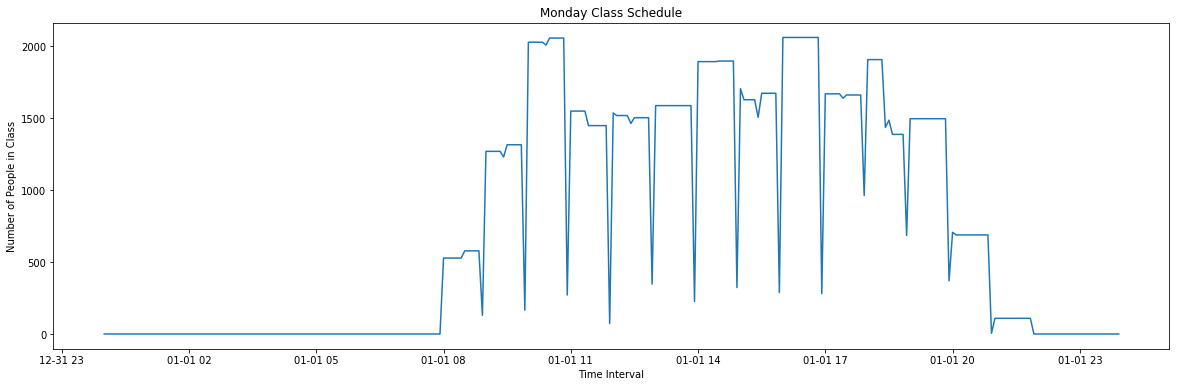

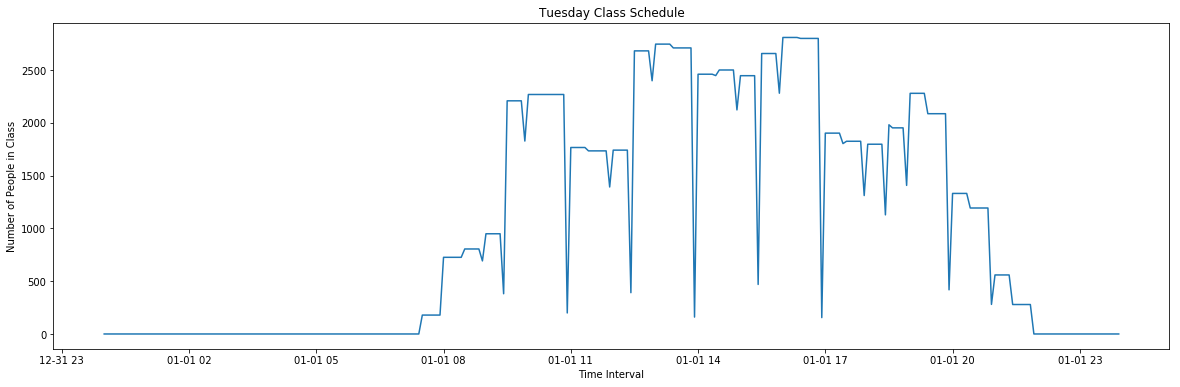

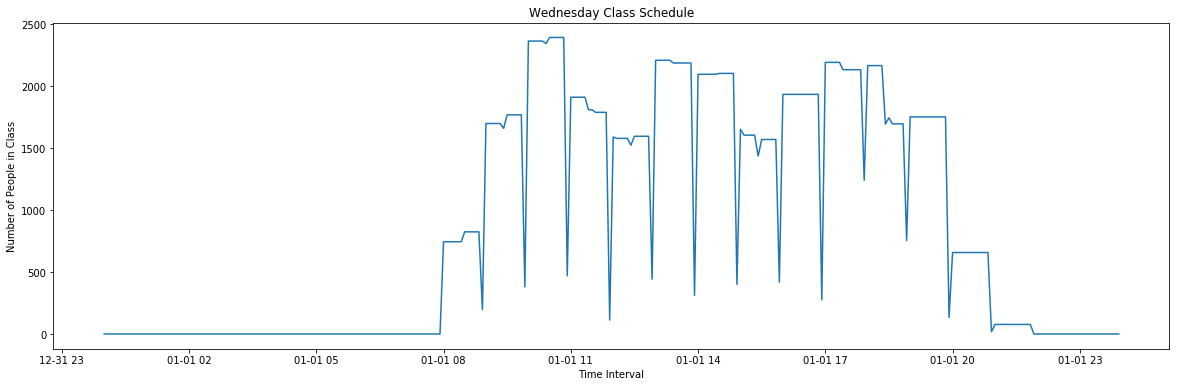

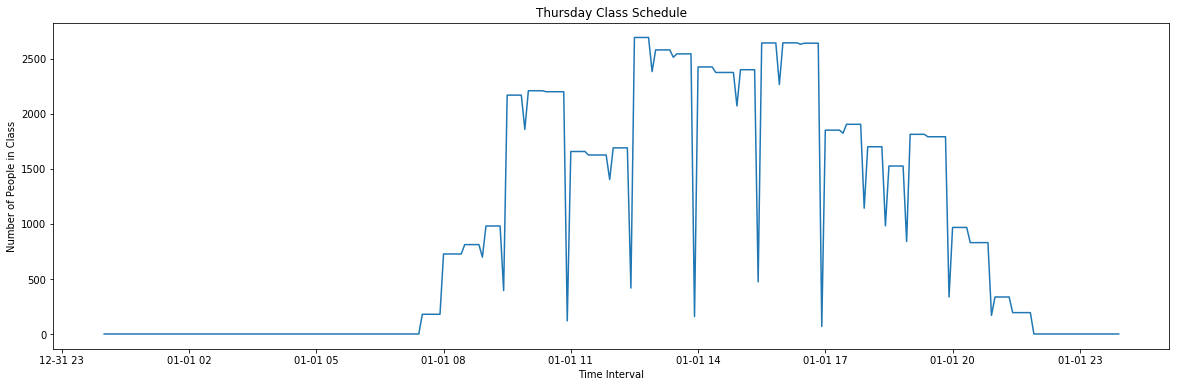

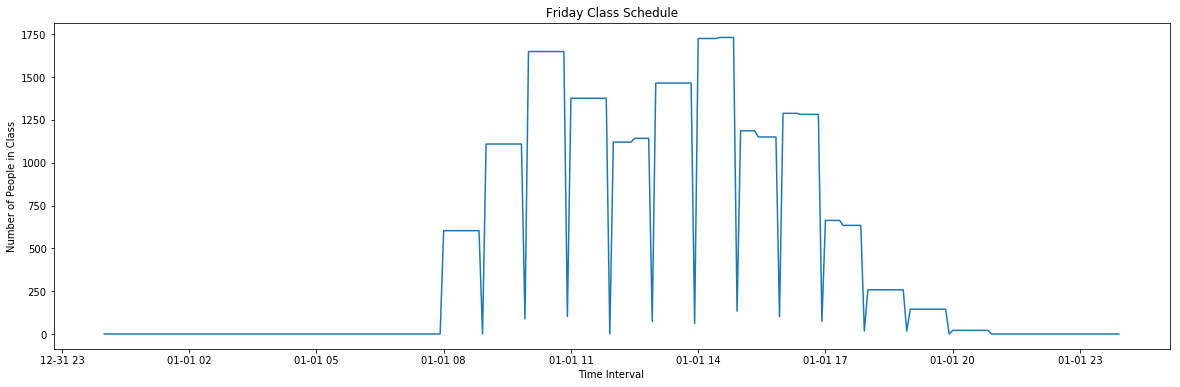

In [10]:
time_interval = pd.date_range("1900-01-01 00:00:00", "1900-01-01 23:55:00", freq="5min")
new_df_m = pd.DataFrame()
new_df_m['time'] = time_interval
new_df_m['number_of_people'] = sum_m
new_df_m.set_index('time', inplace=True)

new_df_t = pd.DataFrame()
new_df_t['time'] = time_interval
new_df_t['number_of_people'] = sum_t
new_df_t.set_index('time', inplace=True)

new_df_w = pd.DataFrame()
new_df_w['time'] = time_interval
new_df_w['number_of_people'] = sum_w
new_df_w.set_index('time', inplace=True)

new_df_r = pd.DataFrame()
new_df_r['time'] = time_interval
new_df_r['number_of_people'] = sum_r
new_df_r.set_index('time', inplace=True)

new_df_f = pd.DataFrame()
new_df_f['time'] = time_interval
new_df_f['number_of_people'] = sum_f
new_df_f.set_index('time', inplace=True)

plt.plot(new_df_m)
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Monday Class Schedule')
plt.show()
plt.plot(new_df_t)
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Tuesday Class Schedule')
plt.show()
plt.plot(new_df_w)
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Wednesday Class Schedule')
plt.show()
plt.plot(new_df_r)
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Thursday Class Schedule')
plt.show()
plt.plot(new_df_f)
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Friday Class Schedule')
plt.show()

In [11]:
new_df_m.to_csv('data/monday_class_schedule.csv')
new_df_m.to_csv('data/tuesday_class_schedule.csv')
new_df_m.to_csv('data/wednesday_class_schedule.csv')
new_df_m.to_csv('data/thursday_class_schedule.csv')
new_df_m.to_csv('data/friday_class_schedule.csv')

In [14]:
def get_index_dictionary():
    index_dictionary = {}
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    index = 0
    while current_time != end_time:
        index_dictionary[str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)] = index 
        index += 1
        current_time += datetime.timedelta(minutes=5)
    return index_dictionary

In [15]:
def transform_datetime(time):
    return datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")

In [16]:
def get_key(datetime):
    return str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)

In [17]:
def get_time_interval_df():
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    time = []
    while current_time != end_time:
        time.append(current_time)
        current_time += datetime.timedelta(minutes=5)
    return time

In [18]:
def get_machine_start_time(series):
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    find_signal = False
    row_idx = 0
    while not find_signal: 
        if int(series[row_idx]) > 0 or current_time == end_time:
            find_signal = True
            break
        current_time += datetime.timedelta(minutes=5)
        row_idx += 1
    return current_time 

In [22]:
# This cell takes a long time to run. (~ a couple of minutes)
df = pd.read_csv('data/geisel_Fall2017.csv')
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df['weekday'] = df['Time_Stamp'].dt.weekday
# df.index = pd.to_datetime(df['Time_Stamp'])
# df = df.resample('5T').mean()
df = df.dropna()

current_time = datetime.datetime(2017, 9, 28)
end_time = datetime.datetime(2017, 12, 17)
row_idx = 0 

index_dictionary = get_index_dictionary()

sums = np.array([np.zeros(len(index_dictionary))]*7, dtype=float)
counts = np.array([np.zeros(len(index_dictionary))]*7, dtype=float)

while current_time != end_time:
    if current_time == datetime.datetime.strptime(str(df.iloc[row_idx]['Time_Stamp']), '%Y-%m-%d %H:%M:%S'):
        day_idx = int(df.iloc[row_idx]['weekday'])
        corr_idx = index_dictionary[get_key(current_time)]
        sums[day_idx][corr_idx] += df.iloc[row_idx]['Present_Signals']
        counts[day_idx][corr_idx] += 1 
        row_idx += 1 
        current_time += datetime.timedelta(minutes=5)
    elif current_time < datetime.datetime.strptime(str(df.iloc[row_idx]['Time_Stamp']), '%Y-%m-%d %H:%M:%S'): 
        current_time += datetime.timedelta(minutes=5)
    else:
        row_idx += 1

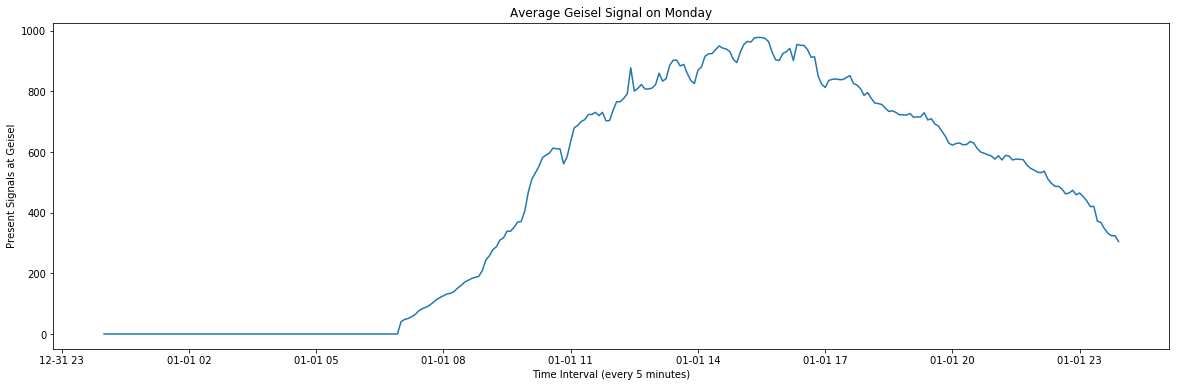

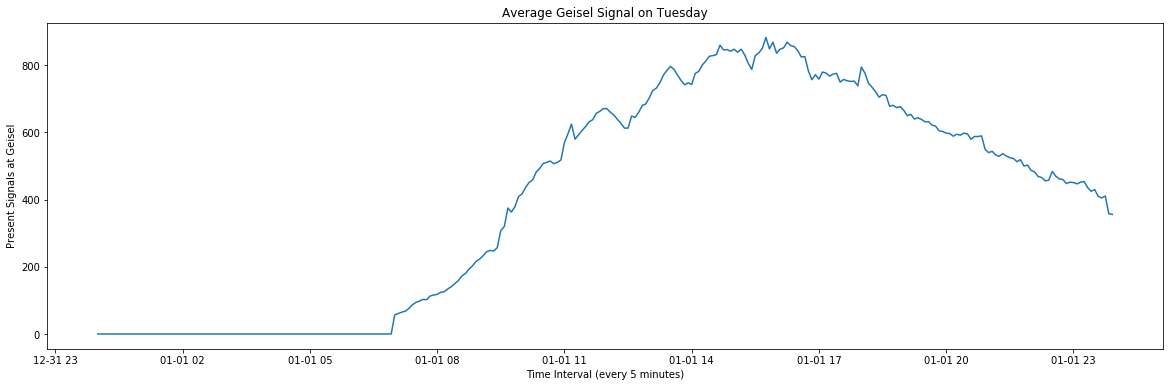

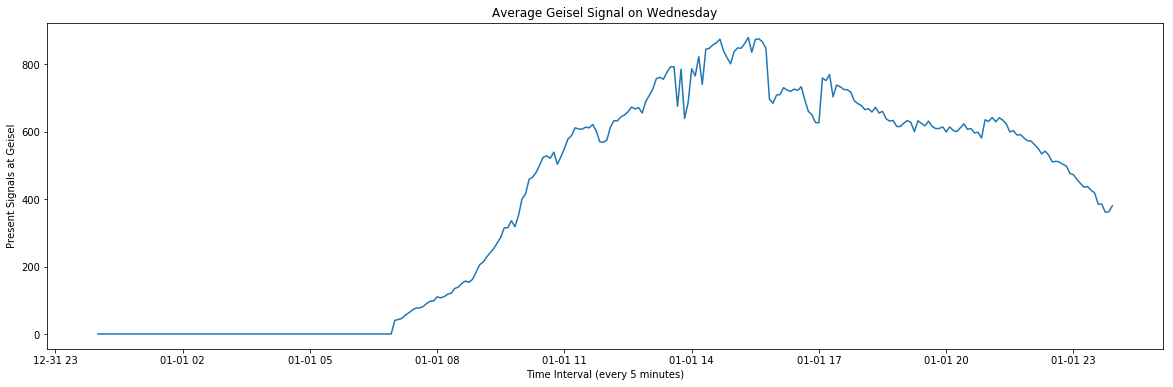

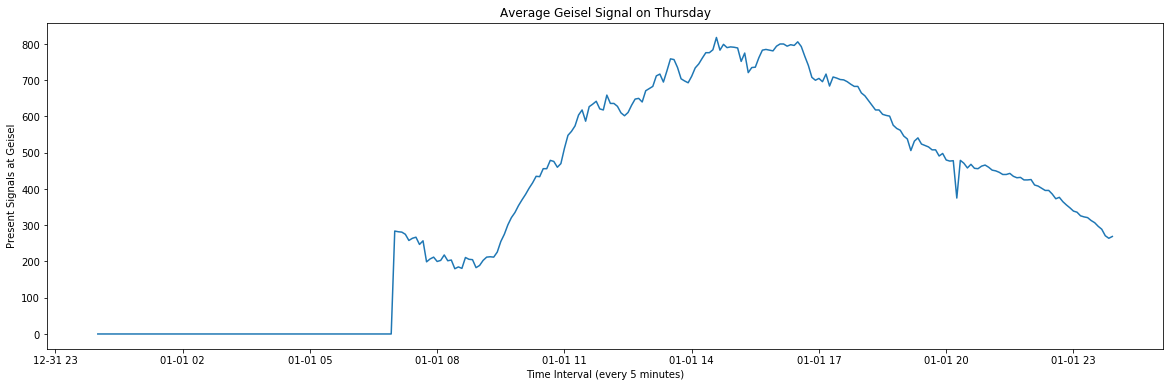

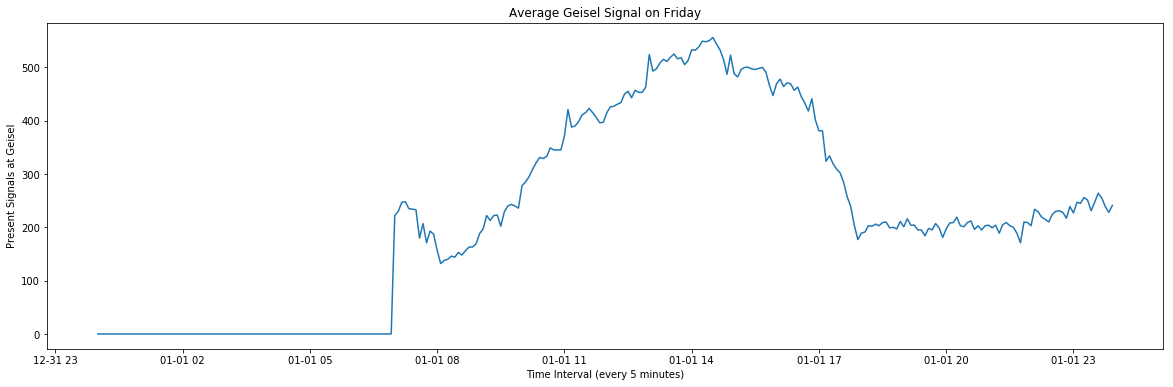

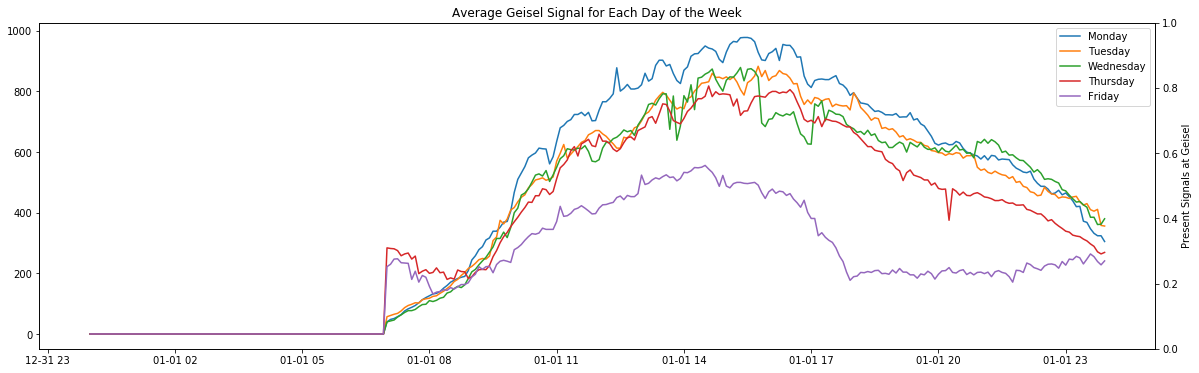

In [23]:
avgs = np.divide(sums, counts, out=np.zeros_like(sums), where=counts!=0)
avgs = avgs.astype(int)
time_df = get_time_interval_df() 
xfmt = mdates.DateFormatter('%H:%M')

df_m = pd.DataFrame({'Time_Stamp': time_df})
df_m['Present_Signals'] = avgs[0]
plt.plot(df_m['Time_Stamp'], df_m['Present_Signals'])
plt.title('Average Geisel Signal on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()

df_t = pd.DataFrame({'Time_Stamp': time_df})
df_t['Present_Signals'] = avgs[1]
plt.plot(df_t['Time_Stamp'], df_t['Present_Signals'])
plt.title('Average Geisel Signal on Tuesday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()

df_w = pd.DataFrame({'Time_Stamp': time_df})
df_w['Present_Signals'] = avgs[2]
plt.plot(df_w['Time_Stamp'], df_w['Present_Signals'])
plt.title('Average Geisel Signal on Wednesday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()

df_r = pd.DataFrame({'Time_Stamp': time_df})
df_r['Present_Signals'] = avgs[3]
plt.plot(df_r['Time_Stamp'], df_r['Present_Signals'])
plt.title('Average Geisel Signal on Thursday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()

df_f = pd.DataFrame({'Time_Stamp': time_df})
df_f['Present_Signals'] = avgs[4]
plt.plot(df_f['Time_Stamp'], df_f['Present_Signals'])
plt.title('Average Geisel Signal on Friday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_m['Time_Stamp'], df_m['Present_Signals'], label='Monday')
ax1.plot(df_t['Time_Stamp'], df_t['Present_Signals'], label='Tuesday')
ax1.plot(df_w['Time_Stamp'], df_w['Present_Signals'], label='Wednesday')
ax1.plot(df_r['Time_Stamp'], df_r['Present_Signals'], label='Thursday')
ax1.plot(df_f['Time_Stamp'], df_f['Present_Signals'], label='Friday')
ax1.legend()
plt.title('Average Geisel Signal for Each Day of the Week')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()

In [24]:
print(get_machine_start_time(df_m['Present_Signals']))
print(get_machine_start_time(df_t['Present_Signals']))
print(get_machine_start_time(df_w['Present_Signals']))
print(get_machine_start_time(df_r['Present_Signals']))
print(get_machine_start_time(df_f['Present_Signals']))

1900-01-01 07:00:00
1900-01-01 07:00:00
1900-01-01 07:00:00
1900-01-01 07:00:00
1900-01-01 07:00:00


In [27]:
dfs_m = pd.read_csv('data/monday_class_schedule.csv')
dfs_t = pd.read_csv('data/tuesday_class_schedule.csv')
dfs_w = pd.read_csv('data/wednesday_class_schedule.csv')
dfs_r = pd.read_csv('data/thursday_class_schedule.csv')
dfs_f = pd.read_csv('data/friday_class_schedule.csv')

dfs_m['Time_Stamp'] = dfs_m['Time_Stamp'].apply(transform_datetime)
dfs_t['Time_Stamp'] = dfs_t['Time_Stamp'].apply(transform_datetime)
dfs_w['Time_Stamp'] = dfs_w['Time_Stamp'].apply(transform_datetime)
dfs_r['Time_Stamp'] = dfs_r['Time_Stamp'].apply(transform_datetime)
dfs_f['Time_Stamp'] = dfs_f['Time_Stamp'].apply(transform_datetime)


#Pearson method is not valid because our graphs look like normal distributed, so it is not linear. 
co_m, p_m = stats.spearmanr(df_m['Present_Signals'], dfs_m['number_of_people'])
co_t, p_t = stats.spearmanr(df_t['Present_Signals'], dfs_t['number_of_people'])
co_w, p_w = stats.spearmanr(df_w['Present_Signals'], dfs_w['number_of_people'])
co_r, p_r = stats.spearmanr(df_r['Present_Signals'], dfs_r['number_of_people'])
co_f, p_f = stats.spearmanr(df_f['Present_Signals'], dfs_f['number_of_people'])

print("Comparing number of people in class and foot traffic at Geisel on Monday: "+
     "Correlation coefficient: " + str(co_m) + " with p-value: " + str(p_m))
print("Comparing number aof people in class and foot traffic at Geisel on Tuesday: "+
     "Correlation coefficient: " + str(co_t) + " with p-value: " + str(p_t))
print("Comparing number of people in class and foot traffic at Geisel on Wednesday: "+
     "Correlation coefficient: " + str(co_w) + " with p-value: " + str(p_w))
print("Comparing number of people in class and foot traffic at Geisel on Thursday: "+
     "Correlation coefficient: " + str(co_r) + " with p-value: " + str(p_r))
print("Comparing number of people in class and foot traffic at Geisel on Friday: "+
     "Correlation coefficient: " + str(co_f) + " with p-value: " + str(p_f))

Comparing number of people in class and foot traffic at Geisel on Monday: Correlation coefficient: 0.864403850339 with p-value: 2.16143845742e-87
Comparing number aof people in class and foot traffic at Geisel on Tuesday: Correlation coefficient: 0.862089729232 with p-value: 2.04036231323e-86
Comparing number of people in class and foot traffic at Geisel on Wednesday: Correlation coefficient: 0.773036282257 with p-value: 1.7887860874e-58
Comparing number of people in class and foot traffic at Geisel on Thursday: Correlation coefficient: 0.864323401167 with p-value: 2.33850605575e-87
Comparing number of people in class and foot traffic at Geisel on Friday: Correlation coefficient: 0.781261363438 with p-value: 1.7499431856e-60


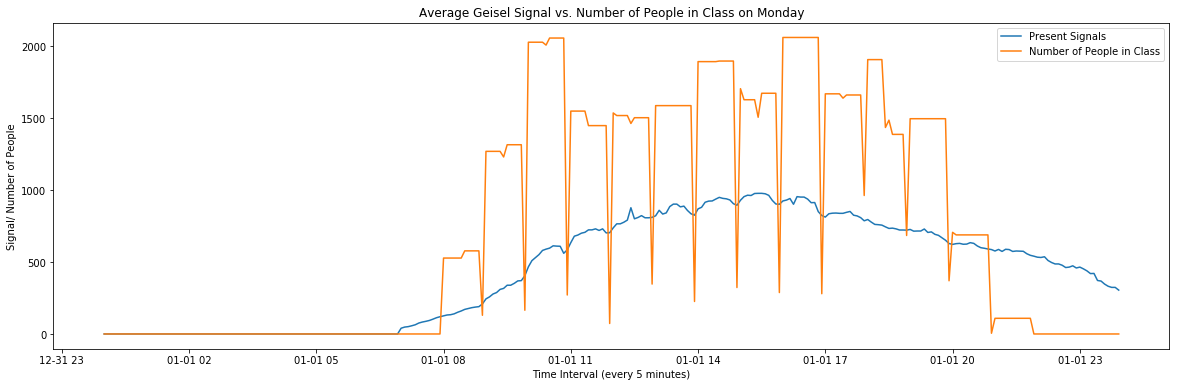

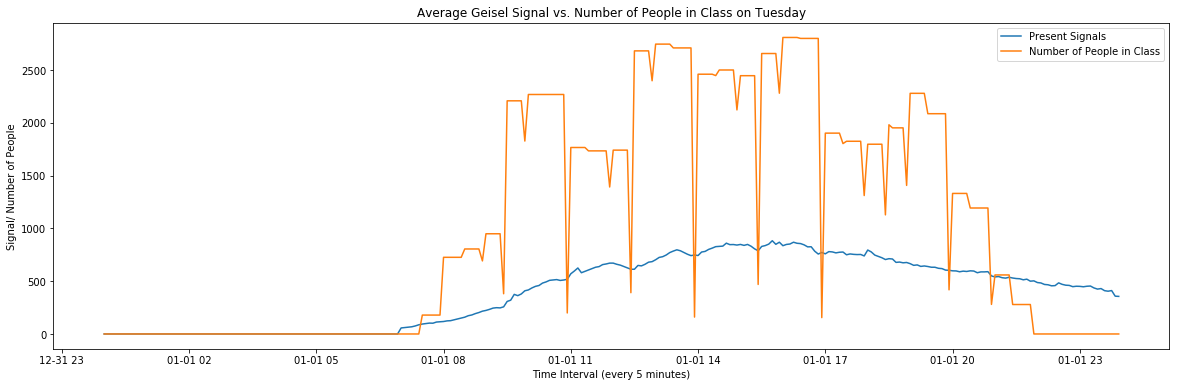

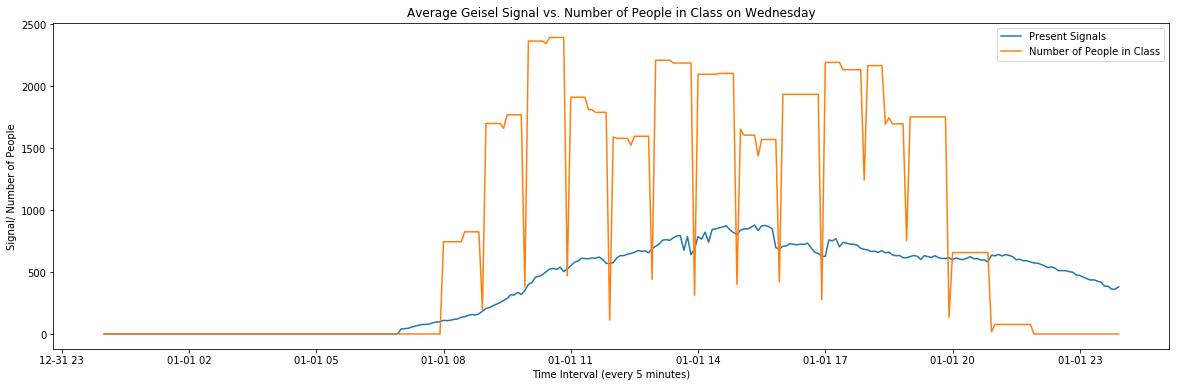

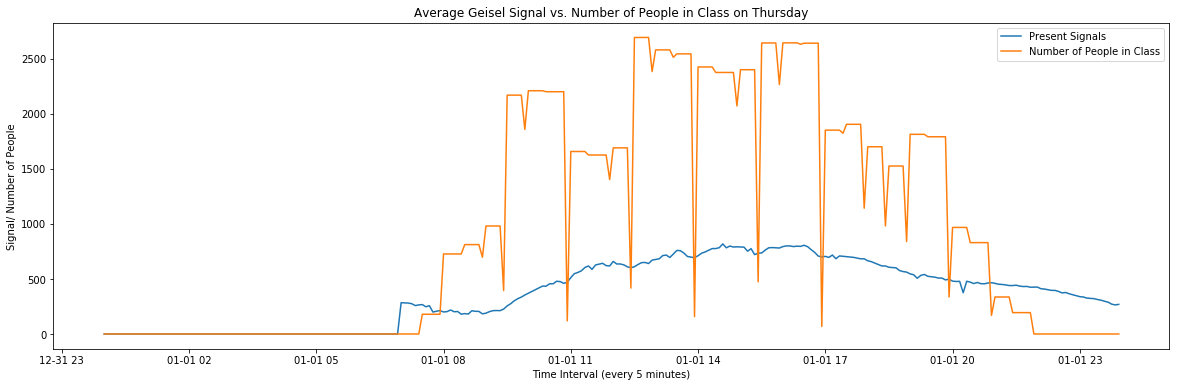

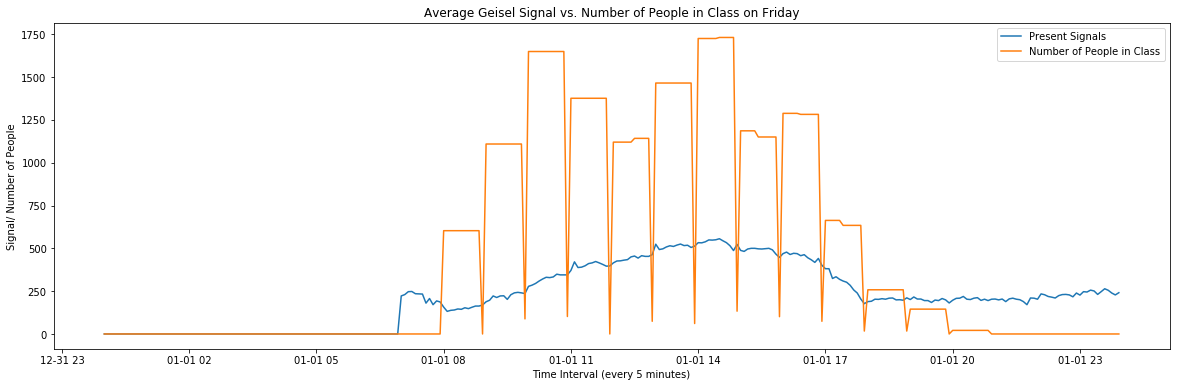

In [28]:
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.plot(df_m['Time_Stamp'], df_m['Present_Signals'])
# ax1.plot(dfs_m['Time_Stamp'], dfs_m['number_of_people'])
# plt.show()

merged_df_m = pd.merge(df_m, dfs_m, on='Time_Stamp')
merged_df_t = pd.merge(df_t, dfs_t, on='Time_Stamp')
merged_df_w = pd.merge(df_w, dfs_w, on='Time_Stamp')
merged_df_r = pd.merge(df_r, dfs_r, on='Time_Stamp')
merged_df_f = pd.merge(df_f, dfs_f, on='Time_Stamp')

fig, ax1 = plt.subplots()
ax1.plot(merged_df_m['Time_Stamp'], merged_df_m['Present_Signals'], label='Present Signals')
ax1.plot(merged_df_m['Time_Stamp'], merged_df_m['number_of_people'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(merged_df_t['Time_Stamp'], merged_df_t['Present_Signals'], label='Present Signals')
ax1.plot(merged_df_t['Time_Stamp'], merged_df_t['number_of_people'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Tuesday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(merged_df_w['Time_Stamp'], merged_df_w['Present_Signals'], label='Present Signals')
ax1.plot(merged_df_w['Time_Stamp'], merged_df_w['number_of_people'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Wednesday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(merged_df_r['Time_Stamp'], merged_df_r['Present_Signals'], label='Present Signals')
ax1.plot(merged_df_r['Time_Stamp'], merged_df_r['number_of_people'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Thursday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(merged_df_f['Time_Stamp'], merged_df_f['Present_Signals'], label='Present Signals')
ax1.plot(merged_df_f['Time_Stamp'], merged_df_f['number_of_people'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Friday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

First, let's plot out geisel throughout both fall and winter quarter.

In [29]:
# TODO(phil): fix the outlier in data cleaning section
ax = df_geisel_fall.plot()
_ = ax.set_title("Geisel's Traffic Fall 2017 By Minute")

NameError: name 'df_geisel_fall' is not defined

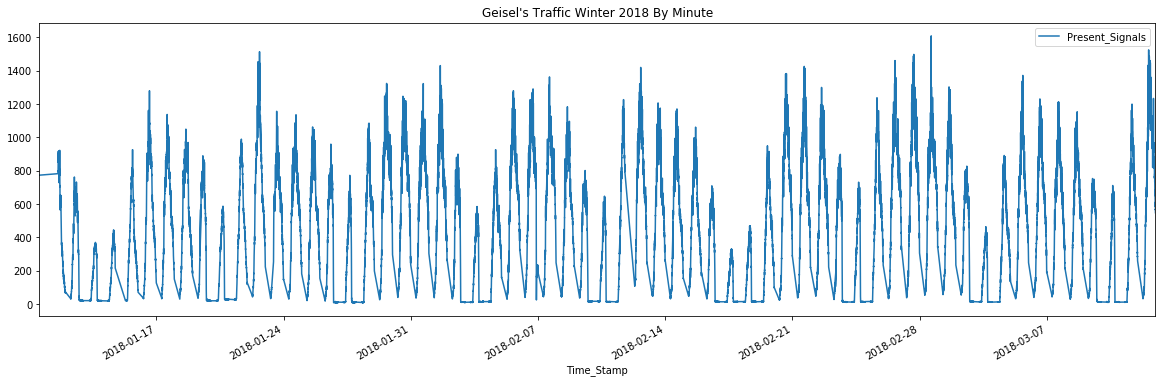

In [73]:
ax = df_geisel_winter.plot()
_ = ax.set_title("Geisel's Traffic Winter 2018 By Minute")

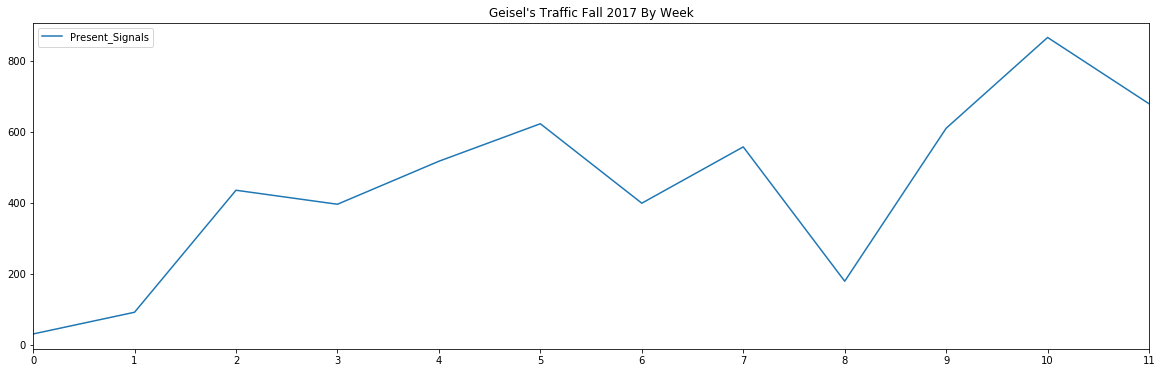

In [149]:
df_week_fall = df_geisel_fall.resample('W').mean()
df_week_fall.index = [week for week in range(len(df_week_fall))]
ax = df_week_fall.plot()
plt.xticks(df_week_fall.index)
_ = ax.set_title("Geisel's Traffic Fall 2017 By Week")

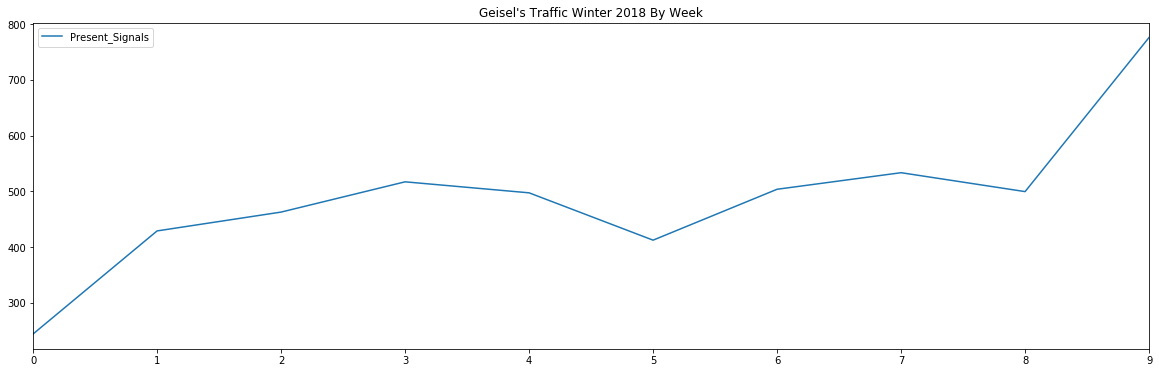

In [74]:
df_week_winter = df_geisel_winter.resample('W').mean()
df_week_winter.index = [week for week in range(len(df_week_winter))]
ax = df_week_winter.plot()
plt.xticks(df_week_winter.index)
_ = ax.set_title("Geisel's Traffic Winter 2018 By Week")

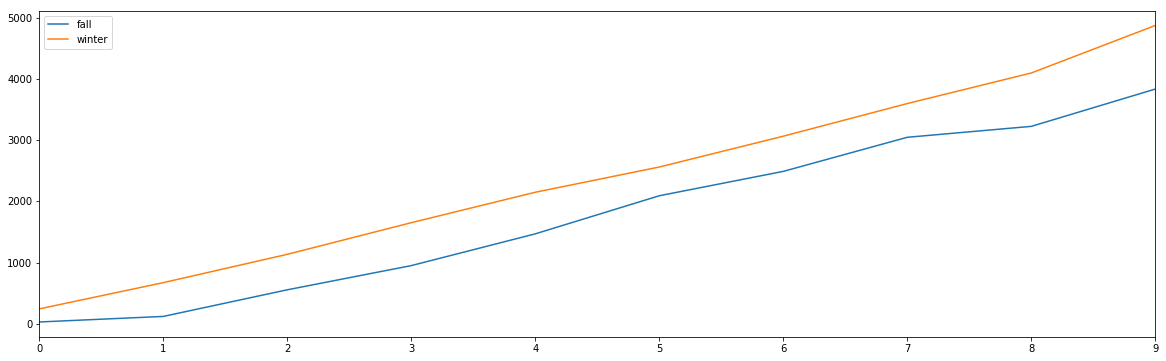

In [103]:
X = [week for week in range(len(df_week_winter))]
fall_weeks = list(df_week_fall['Present_Signals'][:len(df_week_winter.values)])
winter_weeks = list(df_week_winter['Present_Signals'])
week_cmp_df = pd.DataFrame({'fall': fall_weeks, 'winter': winter_weeks}, index=X)
week_cmp_df = week_cmp_df.cumsum()
plt.figure(); week_cmp_df.plot();

We visualize the frequency of signals throughout Geisel over time. There should be a signficant amount of low signals because during the night and most of the morning geisel has relatively few people.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ea4c98828>]], dtype=object)

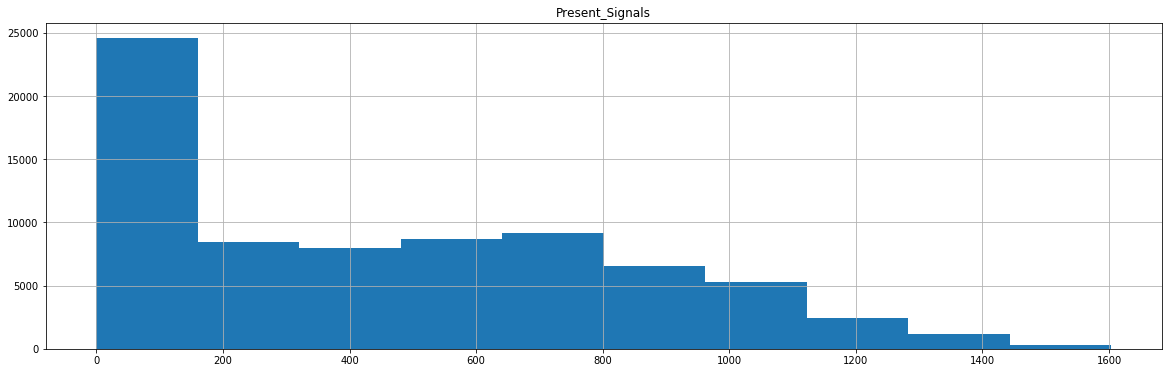

In [154]:
df_geisel_fall.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e9bcc0828>]], dtype=object)

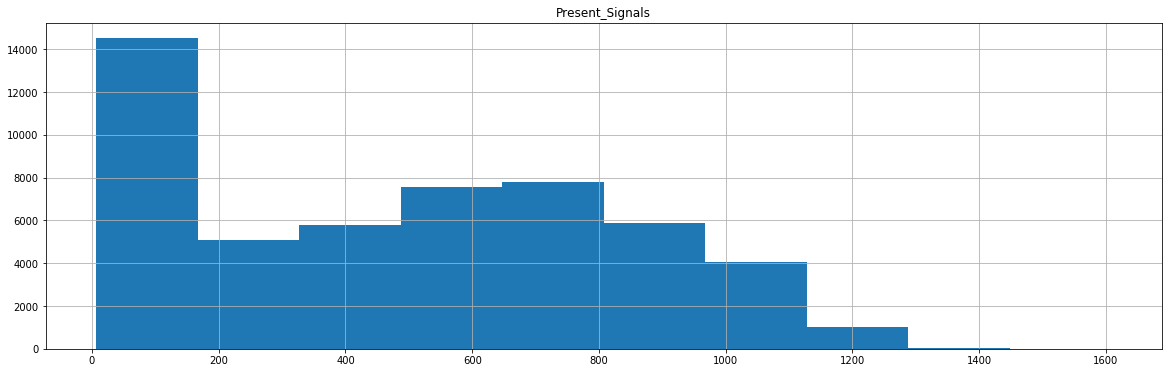

In [155]:
df_geisel_winter.hist()

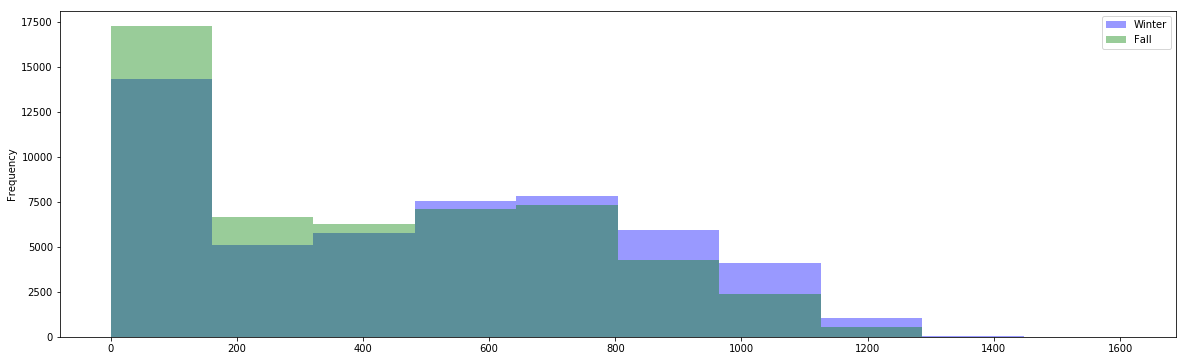

In [161]:
df_days = pd.DataFrame(list(df_geisel_winter['Present_Signals']), columns=['Winter'])
df_days['Fall'] = list(df_geisel_fall['Present_Signals'])[:len(df_days)]
plt.figure();
df_days.plot.hist(color=['blue', 'green'], alpha=0.4)

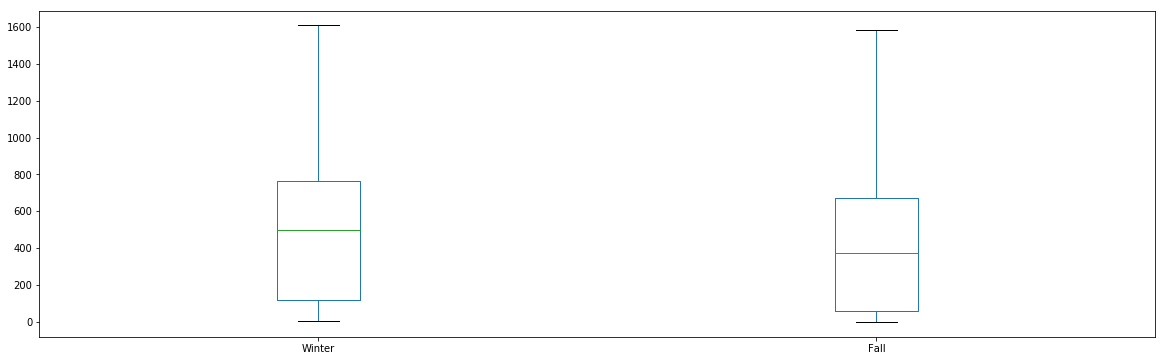

In [163]:
df_days.plot.box()

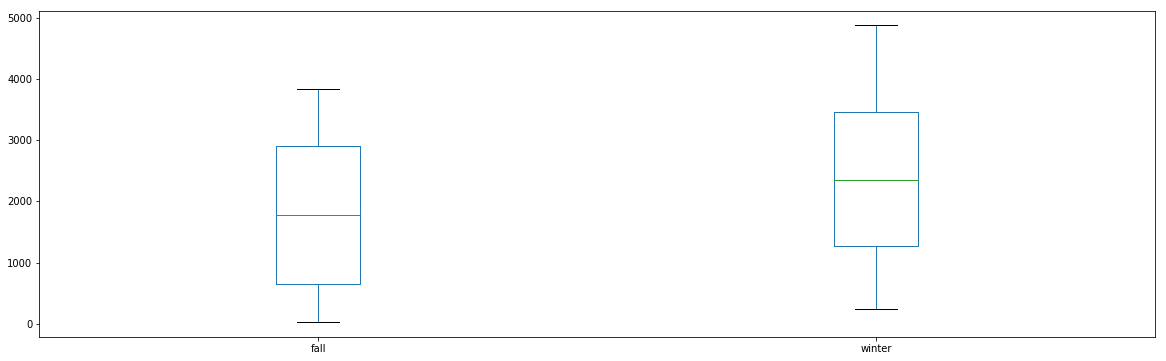

In [166]:
week_cmp_df.plot.box()

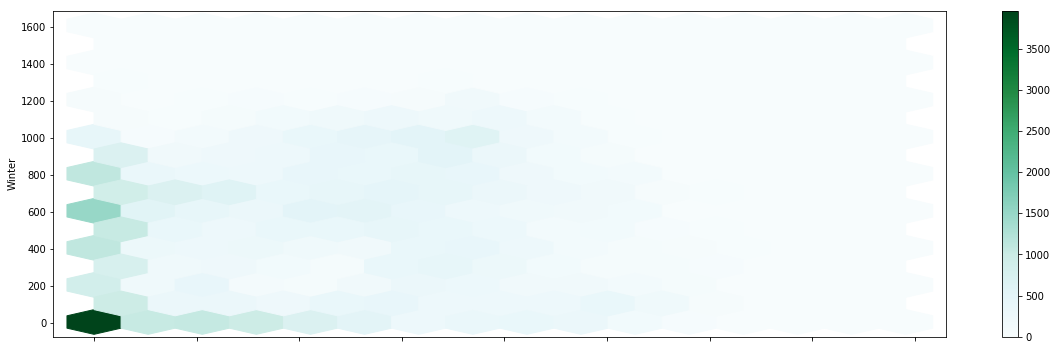

In [174]:
df_days.plot.hexbin(x='Fall', y='Winter', gridsize=15)

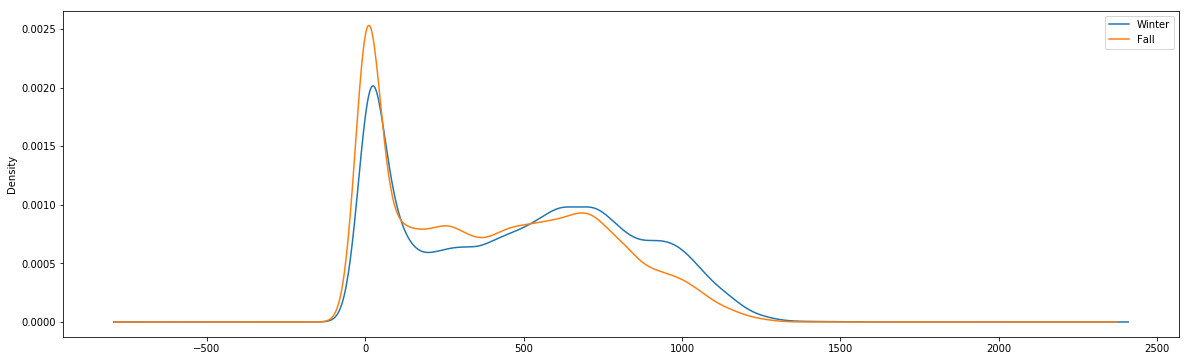

In [184]:
df_days.plot.kde()

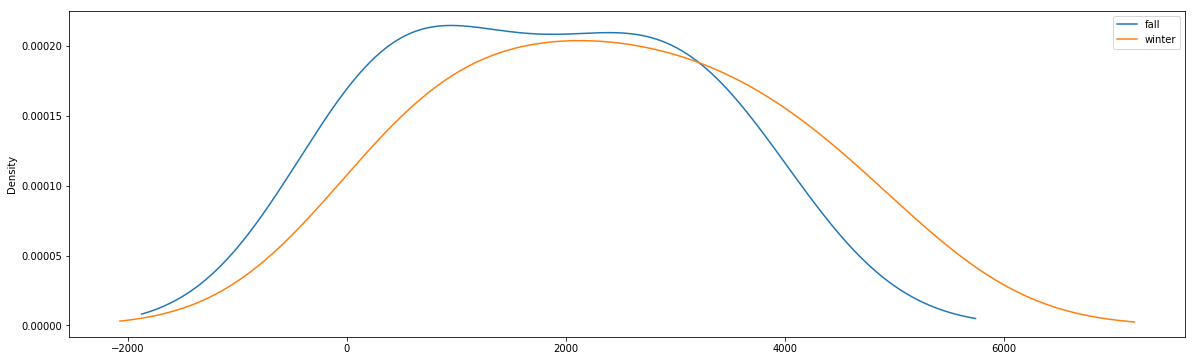

In [185]:
week_cmp_df.plot.kde()

In [194]:
df1 = df_geisel_winter
df1.groupby(df1.index.hour).mean()

,Present_Signals
Time_Stamp,
7,44.585117
8,79.375121
9,168.664504
10,340.286688
11,505.722597
12,596.787055
13,712.527285
14,825.872215
15,865.148693
